## Telco Customer Churn Analysis

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
# Check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
# Check data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
# Let's inspect 'TotalCharges'
df['TotalCharges'].value_counts(dropna=False).head(10)

TotalCharges
         11
20.2     11
19.75     9
20.05     8
19.9      8
19.65     8
45.3      7
19.55     7
20.15     6
20.25     6
Name: count, dtype: int64

In [14]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [15]:
# Now check for nulls again
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
# Drop rows with missing TotalCharges
df = df.dropna(subset=['TotalCharges'])

In [20]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

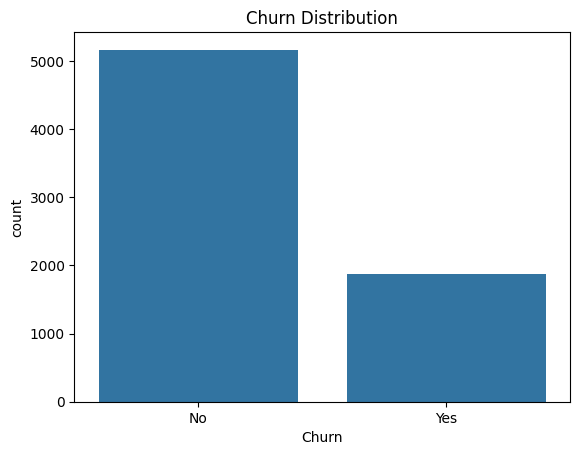

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

In [17]:
# Churn distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Churn percentages
df['Churn'].value_counts(normalize=True) * 100

- At first glance before doing any Exploratory Data Analysis on this dataset, we can see that Telco has a churn rate at 27%.
- This suggests that there are factors within Telco's business model that affect customers decisions to stay with Telco. 
- We will now figure out patterns related to customer churn at Telco, more specifically what kinds of customers are likely to churn and discover any strong relationships between Telco features and churn. 


### Churn by Contract Type

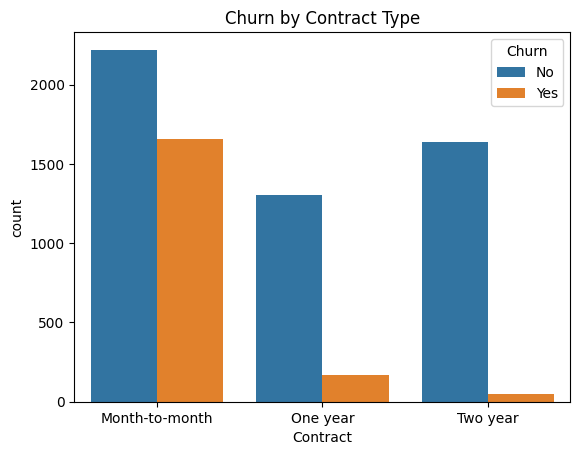

In [21]:
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Churn by Contract Type")
plt.show()

### Churn by Internet Service

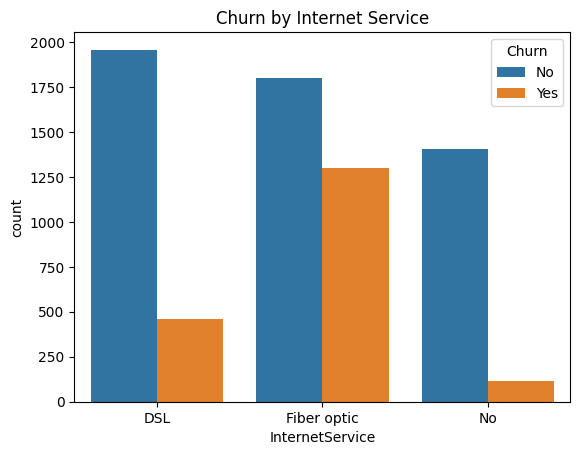

In [22]:
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title("Churn by Internet Service")
plt.show()

### Churn by Payment Method

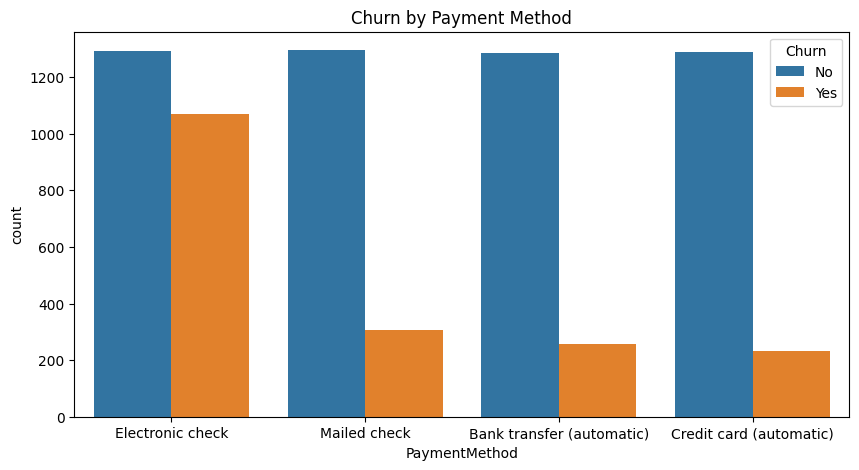

In [25]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title("Churn by Payment Method")
plt.xticks(rotation=0)
plt.show()

### Monthly Charges Distribution by Churn

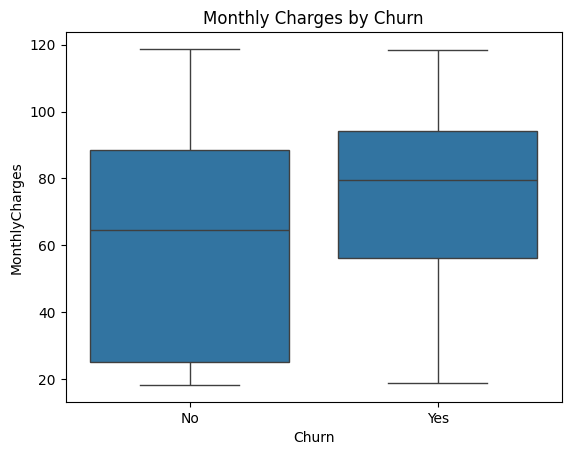

In [27]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges by Churn")
plt.show()

### Tenure Distribution

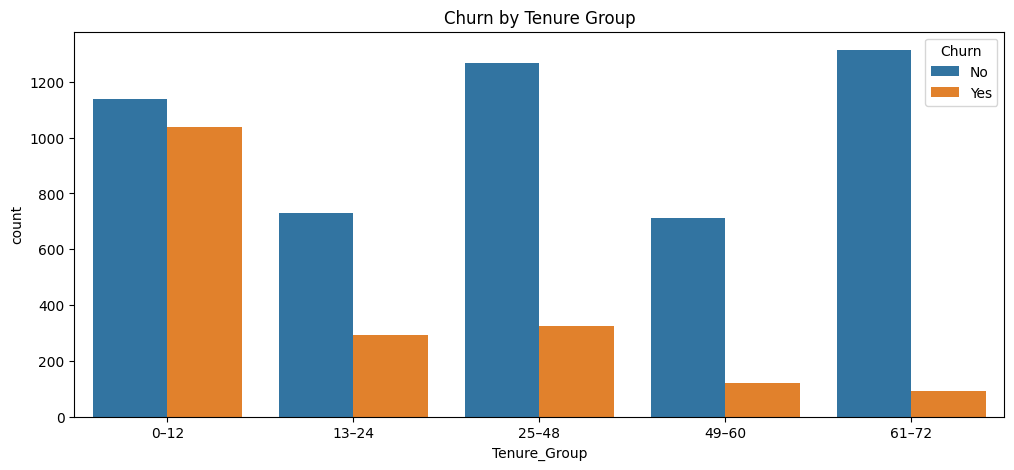

In [36]:
# Create tenure group
df['Tenure_Group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, 72], 
                            labels=['0–12', '13–24', '25–48', '49–60', '61–72'])

# Plot
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Tenure_Group', hue='Churn')
plt.title("Churn by Tenure Group")
plt.show()

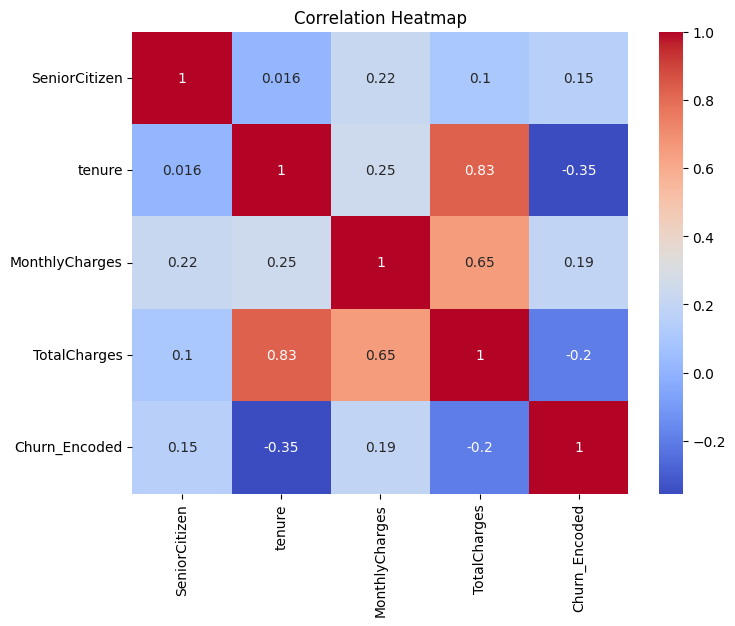

In [ ]:
# Convert 'Churn' to Yes = 1 and No = 0
df['Churn_Encoded'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

- Customers with shorter tenure are significantly more likely to churn.
- Monthly charges are positively correlated with churn, though weakly.
- Senior citizens show slightly higher churn risk.
- Customers who have paid more overall (high TotalCharges) are less likely to churn, likely due to loyalty over time.